# Spatiotemporal analysis

PyLandStats has a specific [`SpatioTemporalAnalysis` class](https://pylandstats.readthedocs.io/en/latest/spatiotemporal.html) to assess how landscapes change in time.

In [1]:
import matplotlib.pyplot as plt
import pylandstats as pls

In [2]:
metrics = ['proportion_of_landscape', 'patch_density', 'edge_density', 'fractal_dimension_am']
class_dict = {10: 'Forest (no bushes)', 11: 'Bushy forest', 12: 'Other forest'}
classes = list(class_dict.keys())

lulc_filepaths = [
    f'../data/raw/{lulc_filename}.tif'
    for lulc_filename in ['AS85R_17', 'AS97R_17', 'AS09R_17', 'AS18_17']
]
years = [1980, 1990, 2005, 2014]

To initialize a `SpatioTemporalAnalysis` instance, we need to provide the (temporally-ordered) list of rasters, the matching list of years to which each landscape corresponds:

In [3]:
sta = pls.SpatioTemporalAnalysis(lulc_filepaths, dates=years)

We can now compute how metrics change in time by means of the `compute_class_metrics_df` method:

In [4]:
%%time
class_metrics_df = sta.compute_class_metrics_df(metrics=metrics, classes=classes)

CPU times: user 58.3 s, sys: 497 ms, total: 58.8 s
Wall time: 58.3 s


Note that the cache mechanisms of the `Landscape` class also operate here:

In [5]:
%%time
more_metrics = metrics + ['landscape_shape_index']
more_classes = [8, 9] + classes
sta.compute_class_metrics_df(metrics=more_metrics, classes=more_classes)

CPU times: user 9.25 s, sys: 16.2 ms, total: 9.27 s
Wall time: 9.19 s


metric          proportion_of_landscape patch_density edge_density  \
class_val dates                                                      
8         1980                  14.0675       1.39967      26.2745   
          1990                  13.8166       1.38008      25.9753   
          2005                  14.5704       1.37552      27.2316   
          2014                  14.7986       1.36134      27.5318   
9         1980                  12.3182      0.438456      16.8563   
          1990                  12.0245      0.441635      16.6318   
          2005                   11.929       0.43158      16.5341   
          2014                  11.8194      0.436135      16.4746   
10        1980                  27.9891      0.816067      28.4676   
          1990                  28.3868      0.795098      28.4902   
          2005                  28.4551      0.806442      28.5384   
          2014                  28.6121      0.815208      28.7085   
11        1980                 0.484089      0.134493      1.22805   
          1990                 0.566245      0.148157      1.41024   
          2005                 0.647285      0.164915      1.59466   
          2014                 0.677965      0.176431      1.67785   
12        1980                  2.54462       1.82266      9.29247   
          1990                  2.46023       1.77608      8.99899   
          2005                  2.37653       1.72091      8.69237   
          2014                  2.38478       1.72787      8.71437   

metric          fractal_dimension_am landscape_shape_index  
class_val dates                                             
8         1980               1.21779                189.12  
          1990               1.21656                188.83  
          2005               1.22092                192.68  
          2014               1.22391               193.392  
9         1980               1.24194               130.017  
          1990               1.23565               129.829  
          2005               1.23632               129.584  
          2014               1.23684               129.809  
10        1980               1.25406               146.566  
          1990               1.26397               145.686  
          2005               1.26422               145.801  
          2014               1.26544               146.155  
11        1980               1.09107               47.3179  
          1990               1.09502               50.3374  
          2005               1.09762               53.3678  
          2014               1.09671               54.8876  
12        1980               1.02677               157.026  
          1990               1.02573               154.723  
          2005               1.02532               152.144  
          2014               1.02541               152.108

We can use the `plot_metric` method to plot metrics:

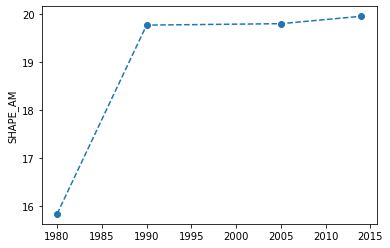

In [6]:
sta.plot_metric('shape_index_am', class_val=10)

We can use what we know about matplotlib to produce interesting plots:

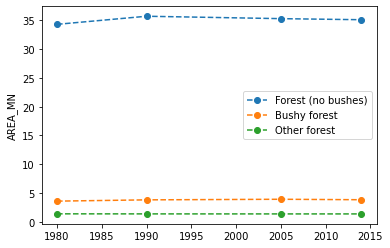

In [7]:
fig, ax = plt.subplots()

for class_val in classes:
    class_label = class_dict[class_val]
    sta.plot_metric('area_mn',
                    class_val=class_val,
                    ax=ax,
                    plot_kws=dict(label=class_label))
ax.legend()